In [1]:
from PIL import Image
from aug_isic import ImgTrainTransform, ImgTrainTransform2
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline


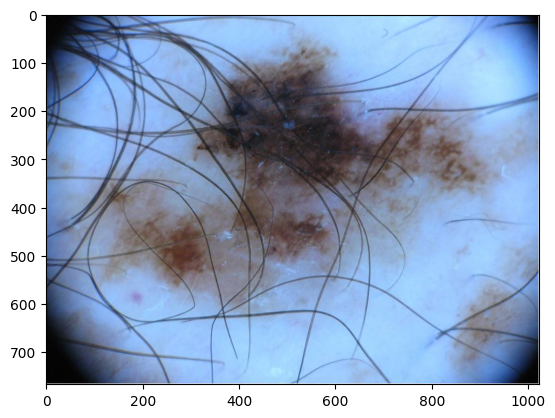

In [3]:
path = "/home/a52550/Desktop/datasets/ISIC2017/train/ISIC-2017_Training_Data/ISIC_0000074.jpg"

image = Image.open(path).convert('RGB')
plt.imshow(image)


In [5]:
def dullrazor(img):
    #Gray scale
    grayScale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY )
    #Black hat filter
    kernel = cv2.getStructuringElement(1,(9,9)) 
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    #Gaussian filter
    bhg= cv2.GaussianBlur(blackhat,(3,3),cv2.BORDER_DEFAULT)
    #Binary thresholding (MASK)
    ret,mask = cv2.threshold(bhg,10,255,cv2.THRESH_BINARY)
    #Replace pixels of the mask
    dst = cv2.inpaint(img,mask,6,cv2.INPAINT_TELEA)   
    return dst

def shade_of_gray_cc(img, power=6, gamma=None):
    """
    img (numpy array): the original image with format of (h, w, c)
    power (int): the degree of norm, 6 is used in reference paper
    gamma (float): the value of gamma correction, 2.2 is used in reference paper
    """
    img_dtype = img.dtype

    if gamma is not None:
        img = img.astype('uint8')
        look_up_table = np.ones((256,1), dtype='uint8') * 0
        for i in range(256):
            look_up_table[i][0] = 255 * pow(i/255, 1/gamma)
        img = cv2.LUT(img, look_up_table)

    img = img.astype('float32')
    img_power = np.power(img, power)
    rgb_vec = np.power(np.mean(img_power, (0,1)), 1/power)
    rgb_norm = np.sqrt(np.sum(np.power(rgb_vec, 2.0)))
    rgb_vec = rgb_vec/rgb_norm
    rgb_vec = 1/(rgb_vec*np.sqrt(3))
    img = np.multiply(img, rgb_vec)

    img = np.clip(img, a_min=0, a_max=255)
    
    return img.astype(img_dtype)

def image_preprocessing(img, pp_enhancement = None, pp_hair_removal = None, pp_color_constancy = None,
                 pp_denoising = None):
    if pp_enhancement == "CLAHE":
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        img[:, :, 0] = clahe.apply(img[:, :, 0])
        img[:, :, 1] = clahe.apply(img[:, :, 1])
        img[:, :, 2] = clahe.apply(img[:, :, 2])
    if pp_enhancement == "contrast":
        img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        img[:,:,2] = cv2.equalizeHist(img[:,:,2])
        img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    if pp_hair_removal == "dull_razor":
        img = dullrazor(img)
    if pp_color_constancy == "shades_of_gray":
        img = shade_of_gray_cc(img)
    if pp_denoising == "non_local_means":
        img = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)
    if pp_denoising == "gaussian_filter":
        img = cv2.GaussianBlur(img,(5,5),0)
    if pp_denoising == "mean_filter":
        img = cv2.blur(img,(5,5))
    return img

In [15]:

nrows = 0
ncols = 0
i1 = 0
i2 = 0
i3 = 0
i4 = 0


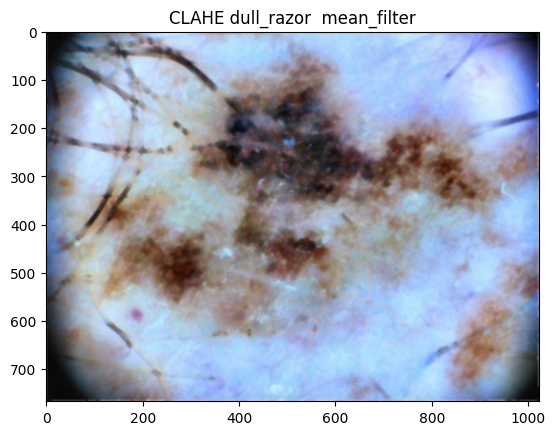

In [22]:
f, ax = plt.subplots(1,1)

pp_enhancement = ['CLAHE', 'contrast', None]
pp_hair_removal = ['dull_razor', None]
pp_color_constancy = ['shades_of_gray', None]
pp_denoising = ['non_local_means', 'gaussian_filter', 'mean_filter', None]

x = image_preprocessing(np.array(image),pp_enhancement=pp_enhancement[i1],pp_hair_removal=pp_hair_removal[i2],pp_color_constancy=pp_color_constancy[i3],pp_denoising=pp_denoising[i4])
                
ax.imshow(x)
ax.set_title((pp_enhancement[i1] if pp_enhancement[i1] != None else "") + " " + (pp_hair_removal[i2] if pp_hair_removal[i2] != None else "") + " " + (pp_color_constancy[i3] if pp_color_constancy[i3] != None else "") + " " + (pp_denoising[i4] if pp_denoising[i4] != None else ""))

i4 += 1
if i4 == 4:
    i4 = 0
    i3 += 1
    if i3 == 2:
        i3 = 0
        i2 += 1
        if i2 == 2:
            i2 = 0
            i1 += 1
            if i1 == 3:
                i1 = 0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Applying transform:
Brightness 9


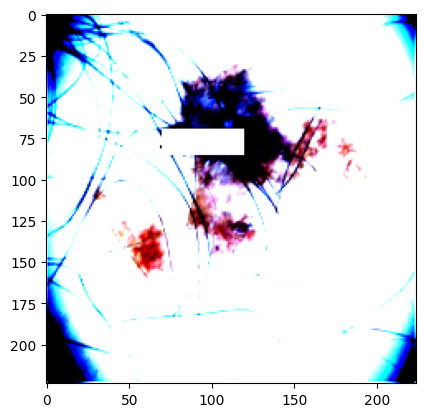

In [12]:
_data_augmentation = False
_PP_enhancement = None
_PP_hair_removal = None
_PP_color_constancy = None
_PP_denoising = None
_PP_normalization = True
_PP_crop_mode = None
_PP_resizing = True



transform = ImgTrainTransform()
x = transform(image)
plt.imshow(x.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


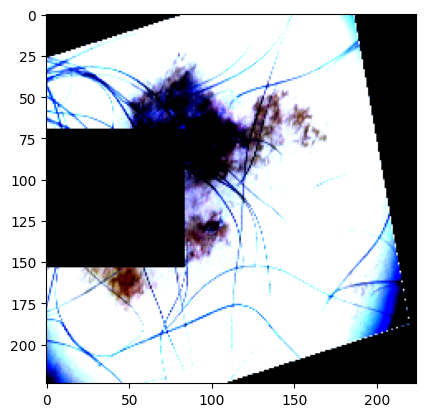

In [11]:
transform = ImgTrainTransform(type=2)
x = transform(image)
plt.imshow(x)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


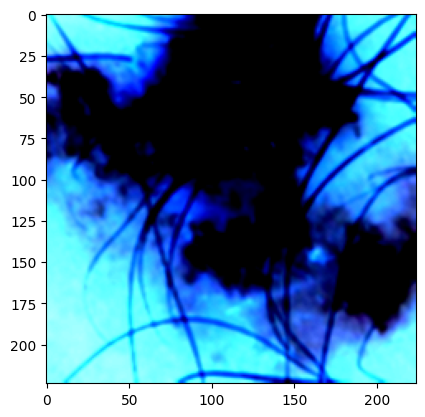

In [23]:
transform = ImgTrainTransform2()
x = transform(image)
plt.imshow(x.permute(1,2,0))
